In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4476-E7F9

 Directory of C:\Users\vishw

02-12-2021  12:42    <DIR>          .
19-11-2021  01:17    <DIR>          ..
15-10-2021  13:55    <DIR>          .android
09-10-2021  11:47    <DIR>          .conda
13-09-2021  08:01    <DIR>          .continuum
01-12-2021  11:52               126 .gitconfig
02-12-2021  12:42    <DIR>          .ipynb_checkpoints
13-09-2021  08:08    <DIR>          .ipython
13-09-2021  22:59    <DIR>          .jupyter
25-11-2021  14:45    <DIR>          .keras
21-09-2021  08:06    <DIR>          .matplotlib
23-09-2021  12:39    <DIR>          .spyder-py3
29-10-2021  18:35    <DIR>          3D Objects
28-09-2021  07:47    <DIR>          anaconda3
19-11-2021  06:11    <DIR>          Contacts
01-12-2021  20:31           683,283 Decision tree.company.vishwas.ipynb
02-12-2021  10:52            20,206 Decision tree.fraudcheck.vishwas.ipynb
12-10-2021  16:49    <DIR>          Documents
02-12-2021  10:22    <DIR>    

In [5]:
tweets=pd.read_csv('C:\\Users\\vishw\\excelr drive files\\Assignments questions of excelr\\Text_Mining\\Elon_musk.csv')
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
len(tweets.index)

1999

In [7]:
tweets['tweets']=tweets['Text']

In [8]:
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']

In [10]:
#RegEx for stopwords
RE_stopwords=r'\b(?:{})\b'.format('|'.join(stopwords))

#dropping all stopwords
words=(tweets.tweets
             .str.lower()
             .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
             .str.cat(sep='')
             .split()
      )

# Generating DataFrame out of Counter

In [11]:
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')
words_data

,Frequency
Word,
�,381
&amp;,216
@spacex,126
tesla,78
@spacex:,71
...,...
physics,6
completing,6
"wow,",6


# We use VADER sentiment analyzer to perform sentimental analysis

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid=SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


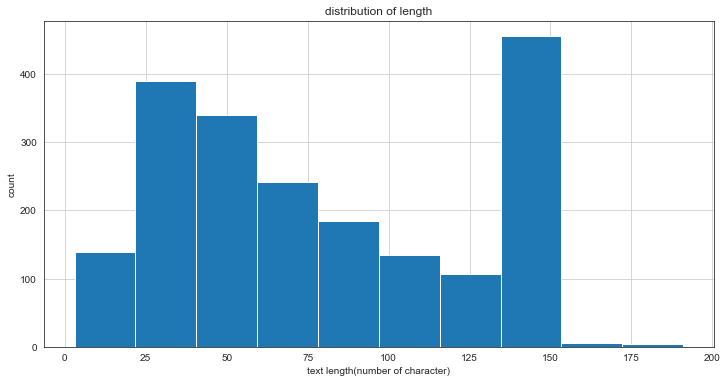

In [13]:
text_length=tweets['tweets'].dropna().map(lambda x:len(x))
plt.figure(figsize=(12,6))
text_length.loc[text_length<1500].hist()
plt.title('distribution of length')
plt.xlabel('text length(number of character)')
plt.ylabel('count')
plt.show()

# Converting all review into Lowercase

In [14]:
tweets["tweets"]= tweets["tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

# removing punctuation from review

In [15]:
import string
tweets["tweets"]=tweets["tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

# Removing Numbers from tweets

In [16]:
tweets["tweets"]=tweets["tweets"].str.replace('[0-9]','')

<ipython-input-16-1a6bf8fdf38d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["tweets"]=tweets["tweets"].str.replace('[0-9]','')


In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words=stopwords.words('english')
tweets["tweets"]=tweets["tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [19]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(tweets):
    Tweets = tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data   = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)

In [20]:
tweets.head(5)

,Unnamed: 0,Text,tweets
0,1,@kunalb11 I�m an alien,kunalb i�m alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...


In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["tweets"]= tweets["tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [23]:
Tweets_set=tweets["tweets"]

In [24]:
import sys

def remove_emoji(tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [25]:
def remove_emoji(tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X   = vec.fit_transform(tweets["tweets"])
df  = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zeros  zikryzamir  zip  zogf

C:\Users\vishw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["tweets"])
print(TFIDF)

  (0, 116)	0.6882633676812043
  (0, 2789)	0.7254609132876334
  (1, 4781)	0.3503086432516702
  (1, 3290)	0.39490911009737484
  (1, 1734)	0.4162521748644735
  (1, 930)	0.35842289988597426
  (1, 4758)	0.4162521748644735
  (1, 3797)	0.4162521748644735
  (1, 2510)	0.2703073340188711
  (2, 2634)	0.5161856469929814
  (2, 1661)	0.30551902189594055
  (2, 4338)	0.5657784482896928
  (2, 2710)	0.5657784482896928
  (3, 4889)	0.6108339384056402
  (3, 1101)	0.5037497388423235
  (3, 1679)	0.6108339384056402
  (4, 1301)	0.28589571153605836
  (4, 3289)	0.2710934355079962
  (4, 5189)	0.2710934355079962
  (4, 2813)	0.3191670019605536
  (4, 1331)	0.40688241503640693
  (4, 145)	0.324071053081029
  (4, 683)	0.35035486639184493
  (4, 4582)	0.182385317836856
  (4, 813)	0.324071053081029
  :	:
  (1994, 152)	0.13847603229290942
  (1994, 4790)	0.21069501406542185
  (1994, 1462)	0.16192378353164613
  (1995, 21)	0.3907529198938182
  (1995, 720)	0.3907529198938182
  (1995, 802)	0.3907529198938182
  (1995, 4578)	0.39

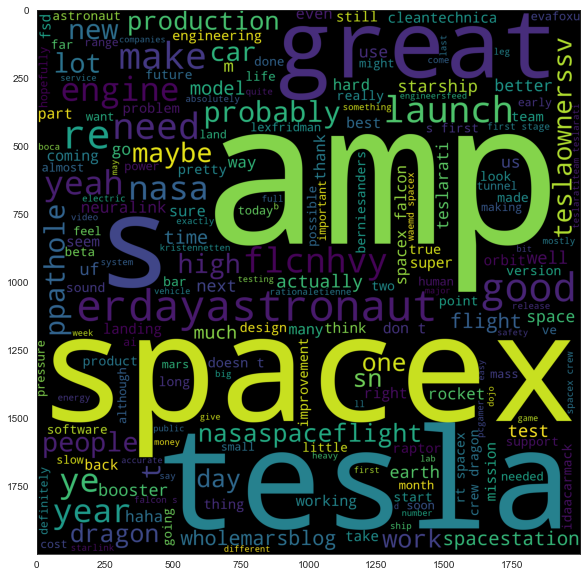

In [28]:
Review_wordcloud=''.join(tweets['tweets'])
Q_wordcloud=WordCloud(
                        background_color='black',
                        width=2000,
                        height=2000
                      ).generate(Review_wordcloud)
fig=plt.figure(figsize=(10,10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [29]:
frequency=pd.Series(''.join(tweets['tweets']).split()).value_counts()[0:20]
frequency

spacex             220
amp                216
tesla              151
great               60
erdayastronaut      57
it�s                52
good                45
launch              44
ppathole            39
flcnhvy             38
first               37
like                37
would               37
nasaspaceflight     36
wholemarsblog       33
also                33
one                 33
yeah                32
probably            32
yes                 31
dtype: int64

In [30]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [32]:
from textblob import TextBlob
tweets['polarity'] = tweets["tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['tweets','polarity']].head(5)

,tweets,polarity
0,kunalb i�m alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulations tesla china amazing ex...,0.20


# Displaying top 5 positive posts of Category_A

In [33]:
tweets[tweets.polarity>0].head(5)

,Unnamed: 0,Text,tweets,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,0.200000
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj,0.468182
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
9,10,The most entertaining outcome is the most likely,entertaining outcome likely,0.250000


In [34]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,tweets,polarity
0,1,kunalb i�m alien,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge underestimated,0.000000
4,5,teslacn congratulations tesla china amazing ex...,0.200000
...,...,...,...
1994,1995,flcnhvy true sounds surreal negative propagand...,0.111111
1995,1996,ppathole make sure read ur terms amp condition...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb dumber ufuf,-0.375000


In [35]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [36]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
negative
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

neutral
neutral
negative
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
positive
neutral
neutral
negative
positive
neutral
positive
neutral
positive
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
positive
neutral
positive
positive
positive
neutral
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
neutral
negative
positive
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
negative
positive
negative
positive
positive
neutral
positive
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
positive
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
positive
positive
positive
neutral
neutral
positive
positive
neutral
positive
neutral
negative
neutral
neutral
positive
neutral
neutral
neutral
negative
positive
positive
positive
neutral
positive
positive
neutral
neutral
neutral
neutral
n

<AxesSubplot:ylabel='count'>

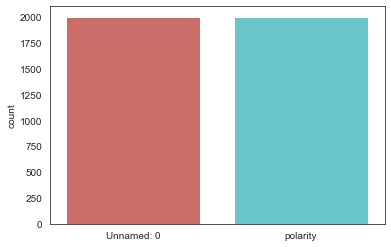

In [37]:
sns.countplot(data=tweets,palette='hls')

In [38]:
tweets.value_counts(normalize=True).mul(100)

Unnamed: 0  tweets                                                                                                                  polarity 
1           kunalb i�m alien                                                                                                        -0.250000    0.050025
1329        wintonark true                                                                                                           0.350000    0.050025
1342        la guerre comme  la guerre                                                                                               0.000000    0.050025
1341        erdayastronaut ppathole spacex we�re pretty close manufacturing size limit milled copper amp steel ja� httpstcotdynxry   0.250000    0.050025
1340        teslarati rawlinson didn�t design model prototype done joined amp left us lurch t� httpstcooyyvmxm                       0.000000    0.050025
                                                                                        

In [ ]:
positive_reviews      = tweets[tweets=='Positive']
negative_reviews      = tweets[tweets=='Negative']
positive_reviews_text =" ".join(positive_reviews.tweets.to_numpy().tolist())
negative_reviews_text =" ".join(negative_reviews.tweets.to_numpy().tolist())
positive_reviews_cloud=(WordCloud(background_color='white',max_words=200).generate(positive_reviews_text))
negative_reviews_cloud=(WordCloud(background_color='white',max_words=200).generate(negative_reviews_text))
plt.imshow(positive_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()